In [25]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot as plt

In [27]:
train = pd.read_csv('train.csv')
train['date'] = pd.to_datetime(train['date'])

In [28]:
df = train[(train['item'] == 1) & (train['store'] == 1)][['date', 'sales']]
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)
df.describe()

,y
count,1826.000000
mean,19.971522
std,6.741022
min,4.000000
25%,15.000000
50%,19.000000
75%,24.000000
max,50.000000


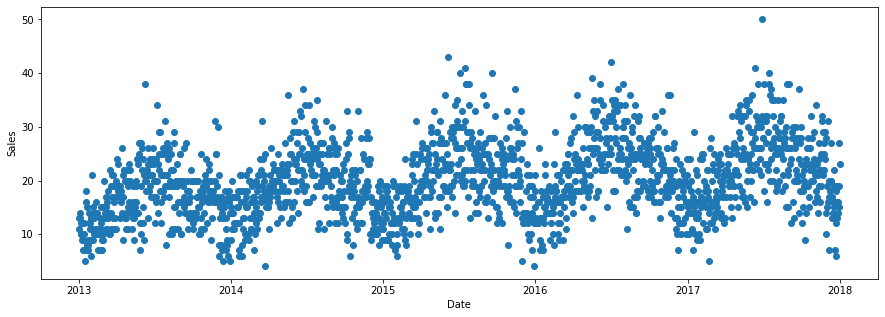

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df['ds'], df['y'], linestyle='None', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

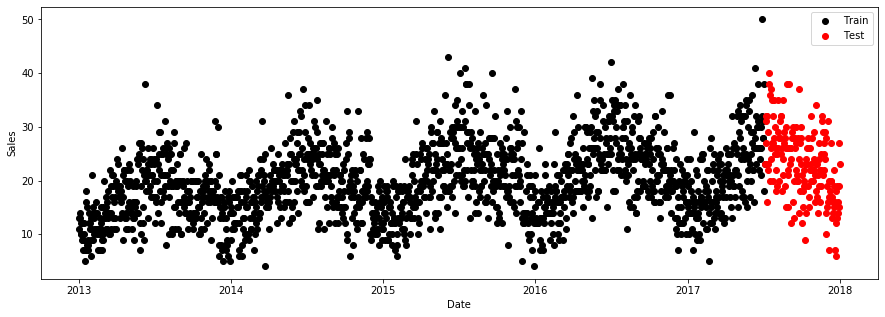

In [30]:
n_tests = 180
df_train = df[:-n_tests]
df_test = df[-n_tests:]
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['ds'], df_train['y'], linestyle='None', marker='o', color='black', label='Train')
ax.plot(df_test['ds'], df_test['y'], linestyle='None', marker='o', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

In [35]:
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    changepoint_prior_scale=0.05
)

model.add_seasonality(
    name='weekly',
    period=7,
    fourier_order=4
)

model.add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=2
)

model.fit(df_train)

In [37]:
forecast = model.predict(df)
forecast[['ds', 'yhat']].head()

,ds,yhat
0,2013-01-01,9.232285
1,2013-01-02,9.853269
2,2013-01-03,10.262092
3,2013-01-04,11.855179
4,2013-01-05,13.551478


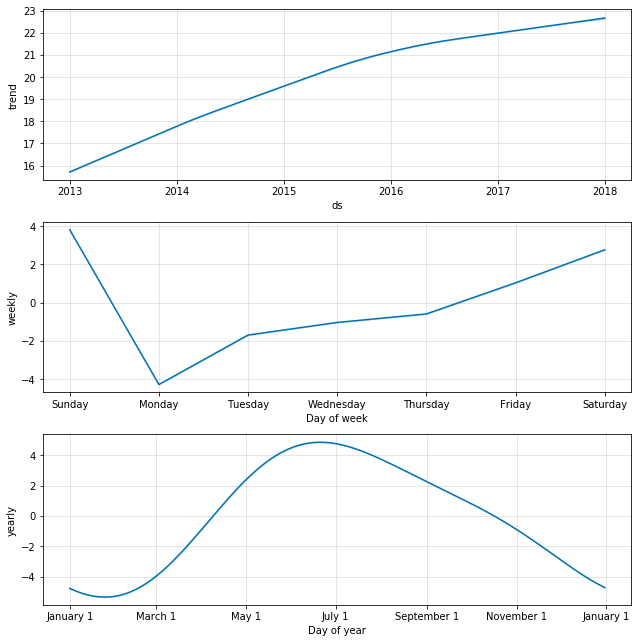

In [38]:
model.plot_components(forecast);

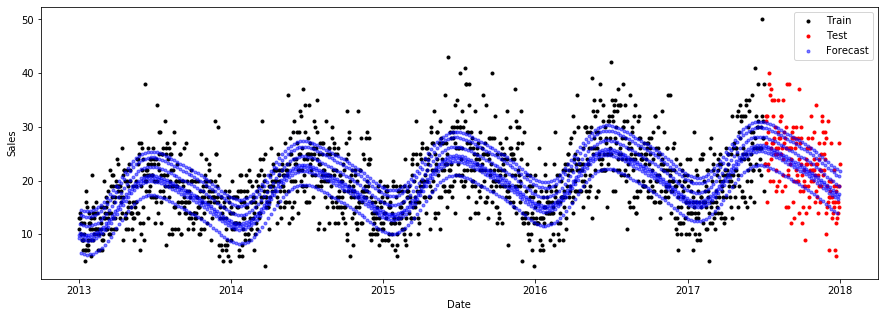

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['ds'], df_train['y'], c='black', marker='o', ms=3, linestyle='None', label='Train')
ax.plot(df_test['ds'], df_test['y'], c='r', marker='o', ms=3, linestyle='None', label='Test')
ax.plot(forecast['ds'], forecast['yhat'], c='b', marker='o', ms=3, linestyle='None', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

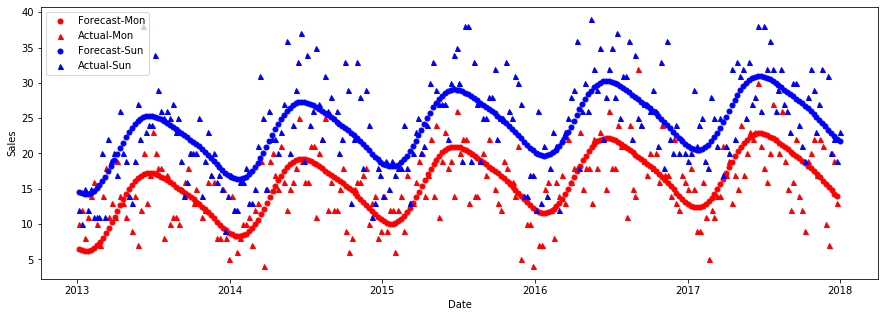

In [42]:
fix, ax = plt.subplots(figsize=(15, 5))
forecast['weekday'] = forecast['ds'].dt.weekday
df['weekday'] = df['ds'].dt.weekday
colors = ['r', 'g', 'yellow', 'pink', 'purple', 'cyan', 'blue']
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for wd in [0, 6]:
    fc_wd = forecast[forecast['weekday'] == wd]
    ax.plot(
        fc_wd['ds'], fc_wd['yhat'],
        c=colors[wd], marker='o', ms=5, linestyle='None',
        label=f'Forecast-{weekdays[wd]}'
    )
    df_wd = df[df['weekday'] == wd]
    ax.plot(
        df_wd['ds'], df_wd['y'],
        c=colors[wd], marker='^', ms=5, linestyle='None',
        label=f'Actual-{weekdays[wd]}'
    )
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

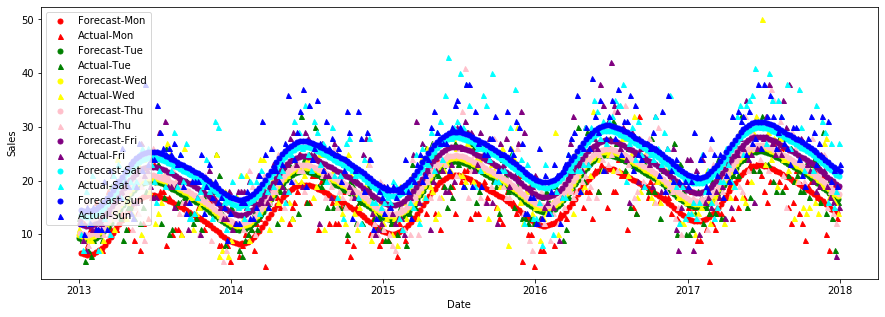

In [43]:
fix, ax = plt.subplots(figsize=(15, 5))
for wd in range(7):
    fc_wd = forecast[forecast['weekday'] == wd]
    ax.plot(
        fc_wd['ds'], fc_wd['yhat'],
        c=colors[wd], marker='o', ms=5, linestyle='None',
        label=f'Forecast-{weekdays[wd]}'
    )
    df_wd = df[df['weekday'] == wd]
    ax.plot(
        df_wd['ds'], df_wd['y'],
        c=colors[wd], marker='^', ms=5, linestyle='None',
        label=f'Actual-{weekdays[wd]}'
    )
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

In [45]:
y_true = df_test['y']
y_forecast = forecast[-n_tests:]['yhat']
smape = ((y_true - y_forecast).abs() / (y_true.abs() + y_forecast.abs())).mean() * 200
print(f'The SMAPE error is: {smape}')

The SMAPE error is: 18.283395195268294
